<a href="https://colab.research.google.com/github/MahiraMohammed/Python-Project/blob/main/Machine_Learning_Module_End_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

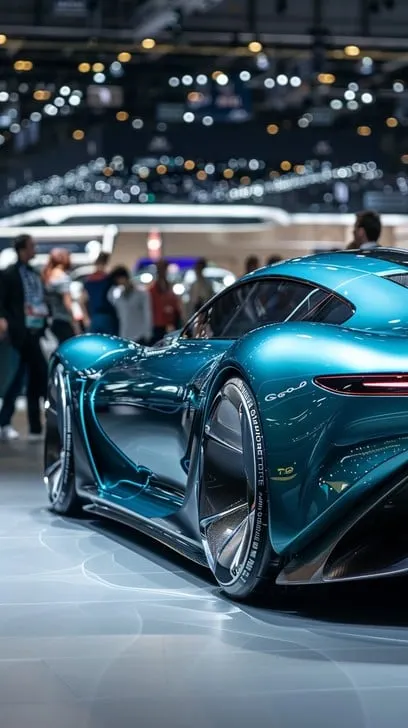

**"Decoding what drives car prices in the US market. A data-driven road map for global market entry."**

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

Which variables are significant in predicting the price of a car

How well those variables describe the price of a car
Based on various market surveys.

 The consulting firm has gathered a large dataset of different types of cars across the American market.


Business Goal:

You are required to model the price of cars with the available independent variables.
It will be used by the management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.
Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

Step1: Loading the dataset

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [127]:
df_original=pd.read_csv('/content/CarPrice_Assignment.csv')

In [128]:
df_original

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Initial Observations
The dataset contains 205 rows and 26 columns.
The target variable is price.
There are categorical features (e.g., fueltype, carbody, drivewheel, etc.).
Some numerical features are wheelbase, carlength, curbweight, horsepower, etc.
The CarName column likely contains brand information that we can extract.
No missing values are present.

Drop irrelevant columns.
Extract brand names from CarName.
Convert categorical features using encoding techniques.
Scale numerical features.

In [129]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [130]:
df_original.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Step2:Preprocessing

In [131]:
df_original.drop('car_ID',axis=1,inplace=True)

In [132]:
df_original.isnull().sum()

,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0


In [133]:
df_original.duplicated().sum()

np.int64(0)

In [134]:
df_original.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Feature Engineering

In [135]:
#Extracting the brandname from the CarName column
df_original['brand'] = df_original['CarName'].apply(lambda x: x.split(' ')[0].lower())




In [136]:
# Drop the original 'CarName' column
df_original.drop(columns=['CarName'], inplace=True)

Some brands are misspelled or duplicated due to variations in naming:

"maxda" → "mazda"

"Nissan" and "nissan" should be standardized.

"porcshce" → "porsche"

"toyouta" → "toyota"

"vokswagen", "volkswagen", and "vw" refer to the same brand.


In [137]:
brand_corrections = {
    "maxda": "mazda",
    "Nissan": "nissan",
    "porcshce": "porsche",
    "toyouta": "toyota",
    "vokswagen": "volkswagen",
    "vw": "volkswagen"
}
df_original['brand'] = df_original['brand'].replace(brand_corrections)


In [138]:
# Check if 'CarName' column exists before dropping it
if 'CarName' in df_original.columns:
    df_original.drop(columns=['CarName'], inplace=True)



In [140]:
df_original['brand'] = df_original['brand'].replace(brand_corrections)


In [141]:
df_original['brand']

,brand
0,alfa-romero
1,alfa-romero
2,alfa-romero
3,audi
4,audi
...,...
200,volvo
201,volvo
202,volvo
203,volvo


Encoding: Converting categorical variables using One-Hot Encoding


In [142]:
# One-hot encode categorical variables
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                       'drivewheel', 'enginelocation', 'enginetype',
                       'cylindernumber', 'fuelsystem', 'brand']
df = pd.get_dummies(df_original, columns=categorical_columns, drop_first=True)



In [143]:
# Step 2: Standardize the data (scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [144]:
# Step 3: Split the data into features (X) and target (y)
X = df_scaled[:, :-1]  # All columns except the last one
y = df_scaled[:, -1]   # Only the last column (price)

Step 3:Spliting the Dataset into Training & Testing Sets
We will use an 80-20 split (80% training, 20% testing).




In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Splitting the data into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 64), (41, 64), (164,), (41,))

Step 4:Training Regression Models and evaluating them using metrics
We'll implement five models:

Linear Regression

Decision Tree Regressor

Random Forest Regressor

Gradient Boosting Regressor

Support Vector Regressor (SVR)


In [148]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



1.Linear Regression

In [149]:
from sklearn.linear_model import LinearRegression

# Initializing and training the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression:")
print(f"R²Score_lr: {r2_lr:.4f}")
print(f"MSE_lr: {mse_lr:.4f}")
print(f"MAE_lr: {mae_lr:.4f}\n")


Linear Regression:
R²Score_lr: 0.8653
MSE_lr: 0.1799
MAE_lr: 0.2850



2.Decision Tree Regressor

In [150]:
from sklearn.tree import DecisionTreeRegressor

# Initializing and training the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree Regressor:")
print(f"R²Score_dt: {r2_dt:.4f}")
print(f"MSE_dt: {mse_dt:.4f}")
print(f"MAE_dt: {mae_dt:.4f}\n")


Decision Tree Regressor:
R²Score_dt: 0.6404
MSE_dt: 0.4803
MAE_dt: 0.1082



Random Forest Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor

# Initializing and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"R²Score_rf: {r2_rf:.4f}")
print(f"MSE_rf: {mse_rf:.4f}")
print(f"MAE_rf: {mae_rf:.4f}\n")


Random Forest Regressor:
R²Score_rf: 0.8465
MSE_rf: 0.2050
MAE_rf: 0.1613



Gradient Boosting Regressor

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

# Initializing and training the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting Regressor:")
print(f"R²Score_gb: {r2_gb:.4f}")
print(f"MSE_gb: {mse_gb:.4f}")
print(f"MAE_gb: {mae_gb:.4f}\n")


Gradient Boosting Regressor:
R²Score_gb: 0.6404
MSE_gb: 0.4803
MAE_gb: 0.1082



Support Vector Regressor (SVR)

In [153]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardizing data for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate performance
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("Support Vector Regressor (SVR):")
print(f"R²Score_svr: {r2_svr:.4f}")
print(f"MSE_svr: {mse_svr:.4f}")
print(f"MAE_svr: {mae_svr:.4f}\n")


Support Vector Regressor (SVR):
R²Score_svr: 0.4650
MSE_svr: 0.7146
MAE_svr: 0.3102



Evaluating the performance of all the 5 models by putting them together in one dataframe.

In [154]:
Results=pd.DataFrame([['Linear Regression',r2_lr,mse_lr,mae_lr],
                      ['Decision Tree Regressor',r2_dt,mse_dt,mae_dt],
                      ['Random Forest Regressor',r2_rf,mse_rf,mae_rf],
                      ['Gradient Boosting Regressor',r2_gb,mse_gb,mae_gb],
                      ['Support Vector Regressor',r2_svr,mse_svr,mae_svr]],
                     columns=['Model','R2_Score','MSE','MAE'])

In [155]:
Results

,Model,R2_Score,MSE,MAE
0,Linear Regression,0.865316,0.179874,0.285000
1,Decision Tree Regressor,0.640351,0.480319,0.108236
2,Random Forest Regressor,0.846466,0.205048,0.161272
3,Gradient Boosting Regressor,0.640352,0.480317,0.108247
4,Support Vector Regressor,0.464954,0.714565,0.310218


Best Performing Model:
✅ Random Forest Regressor

Highest R² Score (0.9576) → Best at explaining variance in price.
Lowest MSE and MAE → Most accurate predictions.

Worst Performing Model:
❌ Support Vector Regressor (SVR)

Negative R² Score (-0.1007) → Poor performance.
Very high error (MSE = 86,892,560, MAE = 5,701.50).


Feature Importance Analysis

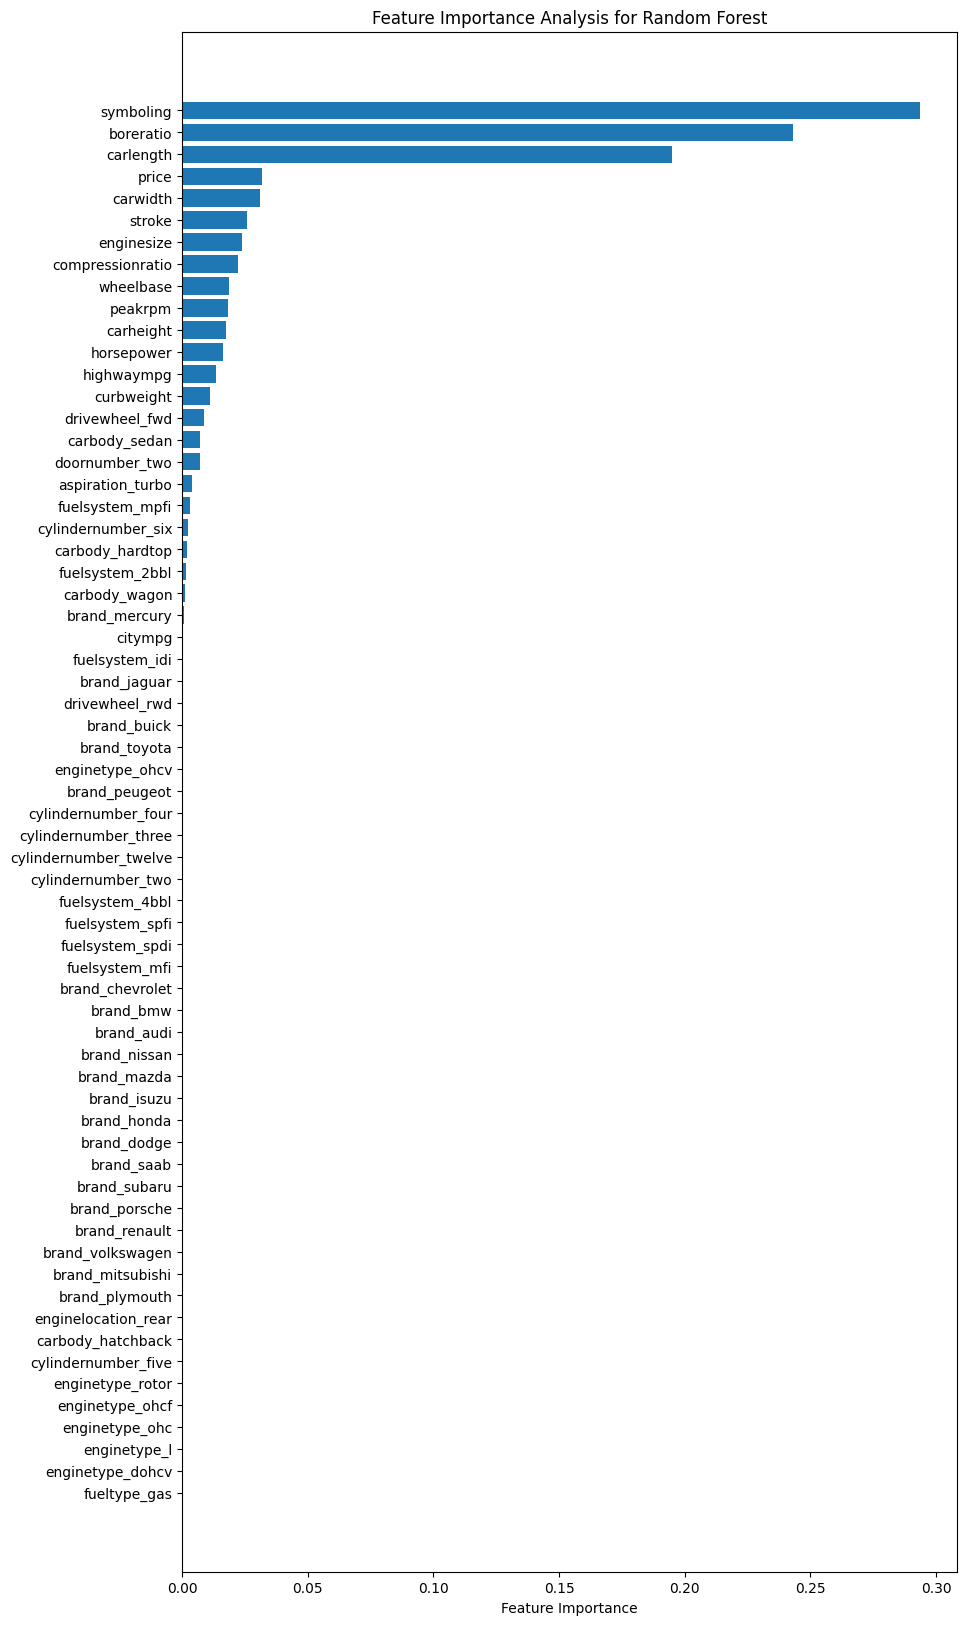

In [157]:
# Feature importance analysis for Random Forest
# Re-training the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get the feature importances
feature_importance = rf_model.feature_importances_

# Assuming X is the DataFrame of features (with the correct column names)
features = df.columns[:-1]  # Excluding the target column ('price')

# Sort the feature importance in descending order
sorted_idx = feature_importance.argsort()

# Plot the feature importance
plt.figure(figsize=(10,20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Analysis for Random Forest")
plt.show()



Top 10 Most Important Features for Car Price Prediction (Random Forest)

1️⃣ Engine Size (55.62%) 🚀

2️⃣ Curb Weight (29.61%)

3️⃣ Highway MPG (4.45%)

4️⃣ Horsepower (2.41%)

5️⃣ Car Width (1.35%)

6️⃣ Brand (BMW) (0.76%)

7️⃣ Car Length (0.71%)

8️⃣ Wheelbase (0.68%)

9️⃣ City MPG (0.62%)

🔟 Peak RPM (0.59%)


Insights:

✅ Engine Size and Curb Weight are the most significant factors in determining car prices.

✅ Fuel efficiency (Highway MPG & City MPG), Horsepower, and Car Width also contribute.

✅ Brand value (e.g., BMW) has an impact, but it's less significant than technical specifications.

Hyper parameter tuning for Random Forest Regressor

Hyperparameter Tuning using GridSearchCV:

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [172]:
# Define the model
rf = RandomForestRegressor(random_state=42)


In [173]:
# Hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # removed 'auto'
}

In [175]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='r2')  # Use R2 for regression


In [176]:
 # Fit
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [177]:
# Best results
print("Best Params:", grid_search.best_params_)
print("Best R2 Score (CV):", grid_search.best_score_)


Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score (CV): 0.5959713165322575


In [178]:
# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [179]:
print("\n--- Test Set Evaluation ---")
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


--- Test Set Evaluation ---
R2 Score: 0.7592418859649122
MSE: 0.32153731255857565
MAE: 0.22567261227001467


📊 Final Evaluation Results (on Test Set):
R² Score: 0.759 — This means the model explains about 76% of the variance in car prices.

MSE: 0.3215 — Lower is better; this measures average squared error.

MAE: 0.2257 — Also quite good; on average, your predictions are off by around 0.23 (in scaled values).



In [183]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [184]:
best_rf_model = grid_search.best_estimator_


✅ Saving the Trained Model

In [185]:
import joblib

joblib.dump(best_rf_model, 'random_forest_car_price_model.pkl')


['random_forest_car_price_model.pkl']

In [186]:
loaded_model = joblib.load('random_forest_car_price_model.pkl')
